In [1]:
import numpy as np
import matplotlib.pyplot as plt
from resonator import Mirror, Resonator
import tqdm

# The RTM

Here are the RTMs:

RTM for propagation in a medium of length L is:

$$
\begin{bmatrix}
1 & L \\
0 & 1
\end{bmatrix}
$$

Reflection from a mirror of radius R is:

$$
\begin{bmatrix}
1 & 0 \\
\frac{2}{R} & 1
\end{bmatrix}
$$

Using these two, the RTM for a spherical mirror resonator is:
$$
\begin{bmatrix}
A & B \\
C & D
\end{bmatrix} = 
\begin{bmatrix}
1 & L \\
\frac{2}{R_1} & 1
\end{bmatrix}
\begin{bmatrix}
1 & L \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & L \\
\frac{2}{R_2} & 1
\end{bmatrix}
\begin{bmatrix}
1 & L \\
0 & 1
\end{bmatrix}

$$

Which, after simplification, becomes:

$$
A = 1 + \frac{2L}{R_2}\\
B = L \left[ 1 + \left( 1 + \frac{2L}{R_2} \right) \right]\\
C = \frac{2}{R_2} + \frac{2}{R_1}\left( 1 + \frac{2L}{R_2} \right)\\
D = \left[\left( 1+ \frac{2L}{R_2} \right) +  \frac{2L}{R_1} \left( 1+ \left( 1 + \frac{2L}{R_2} \right) \right) \right]
$$

## Using the RTM Itself

In [23]:
def get_propogate_rtm(L):
    return np.array([[1, L], [0, 1]])

def get_reflection_rtm(R):
    return np.array([[1, 0], [2/R, 1]])

In [24]:
def get_RTM(R1, R2, L):
    g1 = 1+ 2*L/R1
    g2 = 1+ 2*L/R2
    A = g2
    B = L * (1 + g2)
    C = 2/R2 + 2/R1 * g2
    D = (1 + 2*L/R2 + 2*L/R1 * (1 + g2))
    rtm =  np.array([[A, B], [C, D]])
    assert A*D - B*C == 1
    return rtm

In [25]:
R1 = -0.8
R2 = -0.8
L = 0.7
resonator = Resonator(R1, R2, L)
print(resonator.is_stable)
print(resonator.g1, resonator.g2)

True
0.1250000000000001 0.1250000000000001


In [26]:
RTM = get_RTM(R1, R2, L)
RTM

array([[-0.75  ,  0.175 ],
       [-0.625 , -1.1875]])

In [27]:
# resonator.draw()

In [28]:
# fig = resonator.fig
# ax = resonator.ax

In [29]:
def propogate(pos , R1, R2, L):
    translate = get_propogate_rtm(L)
    pos2 = np.matmul(translate, pos)
    reflect = get_reflection_rtm(R2)
    pos3 = np.matmul(reflect, pos2)
    translate = get_propogate_rtm(L)
    pos4 = np.matmul(translate, pos3)
    reflect = get_reflection_rtm(R1)
    pos5 = np.matmul(reflect, pos4)
    return [pos2, pos3, pos4, pos5]

In [30]:
pos0 = np.array([0.1, -0.5])
positions = propogate(pos0, R1, R2, L)

In [31]:
positions

[array([-0.25, -0.5 ]),
 array([-0.25 ,  0.125]),
 array([-0.1625,  0.125 ]),
 array([-0.1625 ,  0.53125])]

In [32]:
RTM@pos0

array([-0.1625 ,  0.53125])

In [339]:
ys = np.linspace(-0.4, 0.4, 100)
thetas = np.linspace(-np.pi/4, np.pi/4, 100)

# ys, thetas = np.meshgrid(ys, thetas)
ys_final = []
thetas_final = []
round_trips = []
for y in tqdm.tqdm(ys, desc="Searching..."):
    for theta in thetas:
        pos0 = np.array([y, theta])
        y0 = pos0[0]
        for i in range(100):
            pos1 = RTM @ pos0
            # print(pos1[0], y0)
            if pos1[0]>y0:
                break
            if np.isclose(pos1[0], y0, atol=1e-3):
                round_trips.append(i)
                ys_final.append(y)
                thetas_final.append(theta)
                break
            pos0 = pos1

Searching...: 100%|██████████| 100/100 [00:01<00:00, 98.09it/s]


In [340]:
ys_final = np.array(ys_final)
# ys_final = np.unique(ys_final)
thetas_final = np.array(thetas_final)
round_trips = np.array(round_trips)
# thetas_final = np.unique(thetas_final)

len(ys_final), len(thetas_final), len(round_trips)

(145, 145, 145)

In [341]:
mask = round_trips<5
ys_final = ys_final[mask]

In [342]:
thetas_final = thetas_final[mask]

In [344]:
len(thetas_final)

28

In [349]:
round_trips = round_trips[mask]

In [350]:
round_trips

array([0, 0, 0, 2, 0, 4, 0, 0, 0, 1, 2, 1, 2, 4, 4, 1, 1, 2, 4, 2, 1, 2,
       1, 2, 4, 1, 1, 1])

In [327]:
# y0 = 0.12
# thetas = np.linspace(0, np.pi/3, 100)
# final_thetas = []
# round_trips = []
# ys_f = np.zeros((100, 100))
# for theta in thetas:
#     pos0 = np.array([y0, theta])
#     ys = np.zeros(100)
#     # ys[0] = y0
#     for i in range(100):
#         pos0 = np.matmul(RTM.T, pos0)
#         ys[i] = pos0[0]
#         if np.abs(pos0[0] - y0) < 1e-4:
#             final_thetas.append(theta)
#             round_trips.append(i)
#             # ys_f.append(ys)
#             ys_f[i] = ys
#             break
#         ys_f[i] = ys
#     # print(i)

In [351]:
pos0 = np.array([ys_final[5], thetas_final[5]])
# pos0 = np.array([1, 1.10])
ys = [pos0[0]]
for i in range(50):
    pos0 = np.matmul(RTM, pos0)
    # pos0[0] = np.round(pos0[0], 2)
    ys.append(pos0[0])

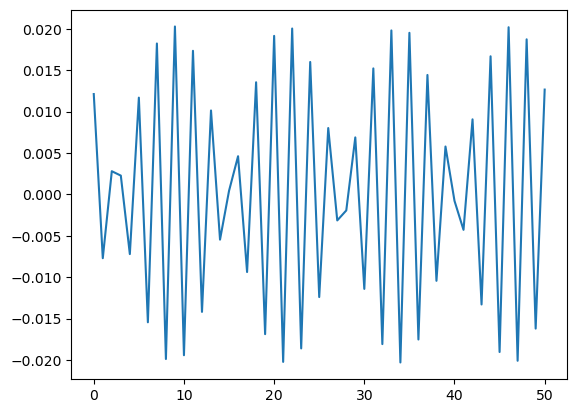

In [352]:
plt.plot(ys)

In [353]:
ys

[0.012121212121212088,
 -0.007702579004095376,
 0.0028025346992227034,
 0.0022726680243513897,
 -0.007205828996403519,
 0.011688625656180427,
 -0.015440883212446056,
 0.018228085567933802,
 -0.019876032575425685,
 0.020281727546953458,
 -0.01941981454679664,
 0.017344163137465028,
 -0.01418450153204185,
 0.010138308580866055,
 -0.00545847134338613,
 0.00043747964694457186,
 0.004610854527431021,
 -0.009371010293842174,
 0.013545477916888187,
 -0.01687335317012869,
 0.019146643850236147,
 -0.02022326928970384,
 0.02003594039856504,
 -0.018596365232515923,
 0.01599451723943456,
 -0.012393011918888532,
 0.008016943353411972,
 -0.0031398158283471632,
 -0.0019335501859893429,
 0.006886069313701514,
 -0.01140820910930734,
 0.015217335835581455,
 -0.018075379072131727,
 0.019803711116673763,
 -0.020294311216423687,
 0.01951651686514713,
 -0.017518940209798873,
 0.014426429791338185,
 -0.01043226751091886,
 0.0057860885110671036,
 -0.0007782789792736547,
 -0.004278172988724398,
 0.009067239144

In [268]:
(0.19989176937132191 - 0.2)*1e3

-0.10823062867809652

In [269]:
ys

[0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3,
 -0.3,
 0.3]

# RTM 2

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from resonator import Mirror, Resonator
import tqdm

In [134]:
R1 = -0.8
R2 = -0.8
L = 1.3
resonator = Resonator(R1, R2, L)
print(resonator.is_stable)
print(resonator.g1, resonator.g2)

True
-0.625 -0.625


In [135]:
def get_propogate_rtm(L):
    return np.array([[1, L], [0, 1]])

def get_reflection_rtm(R):
    return np.array([[1, 0], [2/R, 1]])

In [136]:
def propogate(pos, R1, R2, L):
    translate = get_propogate_rtm(L)
    pos2 = translate @ pos
    yr = pos2[0]
    reflect = get_reflection_rtm(R2)
    pos3 = reflect @ pos2
    translate = get_propogate_rtm(L)
    pos4 = np.matmul(translate, pos3)
    reflect = get_reflection_rtm(R1)
    pos5 = reflect @ pos4
    yl = pos5[0]
    assert yl == pos4[0]
    return (yl, yr), pos5

In [141]:
y0 = 0.2
theta0 = 0.3
pos0 = np.array([y0, theta0])

samples = 100
yls = [y0]
yrs = []
for i in range(samples):
    (yl, yr), pos0 = propogate(pos0, R1, R2, L)
    yls.append(yl)
    yrs.append(yr)

In [142]:
points_left = np.array([-np.ones(samples+1)*L/2, yls]).T
points_right = np.array([np.ones(samples)*L/2, yrs]).T

In [143]:
Xs_left = [p[0] for p in points_left]
# Xs_left_calculated = [resonator.get_left_x(p[1]) for p in points_left]
Ys_left = [p[1] for p in points_left]
Xs_right = [p[0] for p in points_right]
# Xs_right_calculated = [resonator.get_right_x(p[1]) for p in points_right]
Ys_right = [p[1] for p in points_right]

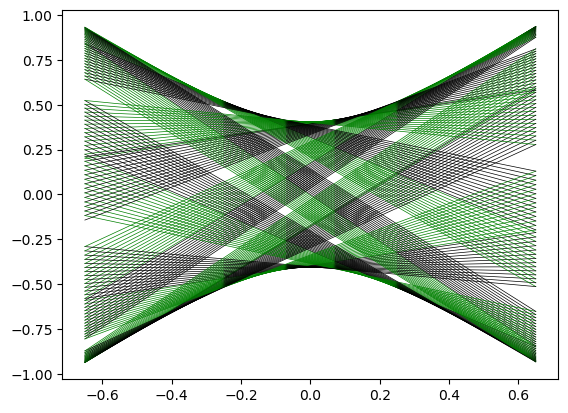

In [146]:
for i in range(samples):
    plt.plot((Xs_left[i], Xs_right[i]), (Ys_left[i], Ys_right[i]), c="g", lw=0.5)
    plt.plot((Xs_right[i], Xs_left[i+1]), (Ys_right[i], Ys_left[i+1]), c= "k", lw=0.5)

# plt.ylim(-1, 1);

```python
plt.plot((x0, x1), (y0, y1), 'k-')
```

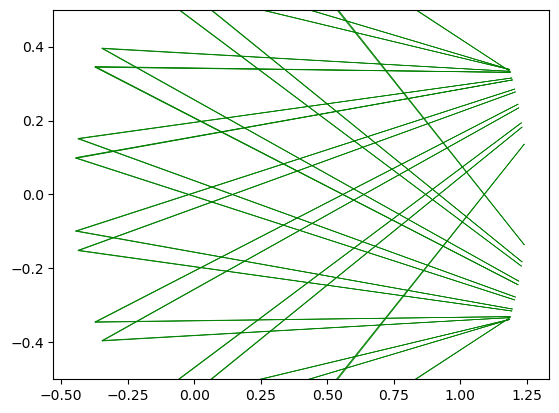

In [67]:
for i in range(samples):
    plt.plot((Xs_left_calculated[i], Xs_right_calculated[i]), (Ys_left[i], Ys_right[i]), c="g", lw=0.5)
    plt.plot((Xs_right_calculated[i], Xs_left_calculated[i+1]), (Ys_right[i], Ys_left[i+1]), c= "g", lw=0.5)

plt.ylim(-0.5, 0.5);

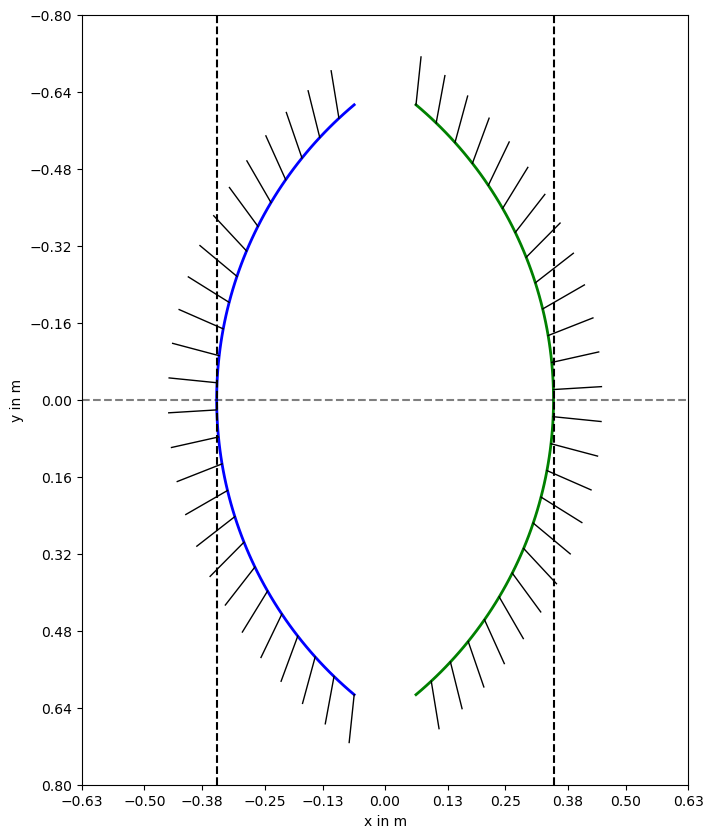

In [10]:
resonator.draw()

In [11]:
fig = resonator.fig
ax = resonator.ax

In [12]:
for i in range(samples):
    ax.plot((Xs_left_calculated[i], Xs_right_calculated[i]), (Ys_left[i], Ys_right[i]), c="g", lw=0.5)
    ax.plot((Xs_right_calculated[i], Xs_left_calculated[i+1]), (Ys_right[i], Ys_left[i+1]), c= "g", lw=0.5)

# plt.ylim(-0.5, 0.5);

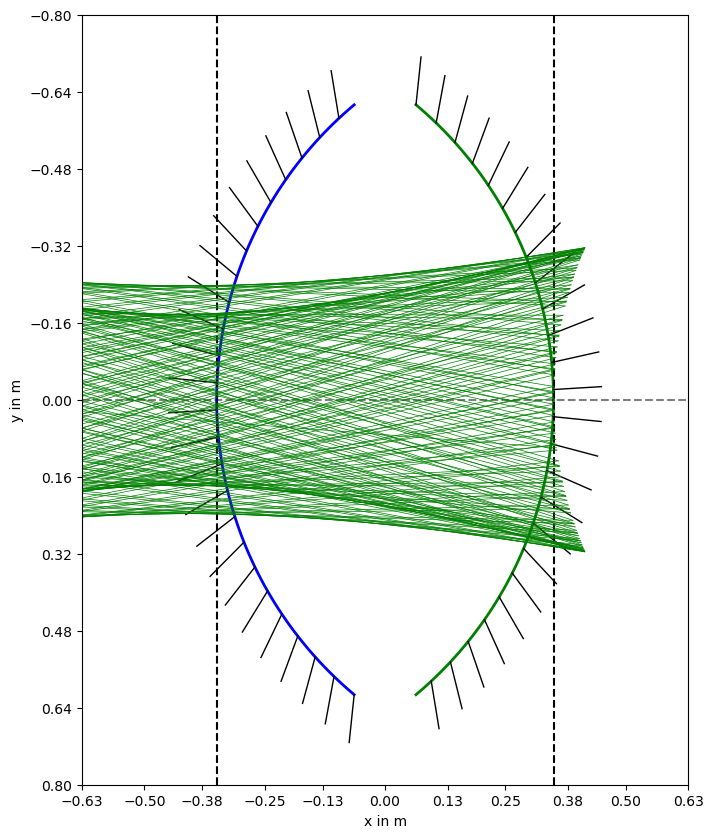

In [13]:
fig